In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('glassdoor_jobs.csv')

df.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

In [79]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    358
na                238
data engineer     158
analyst           124
manager            36
mle                26
director           16
Name: job_simp, dtype: int64

In [80]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        688
senior    266
jr          2
Name: seniority, dtype: int64

In [81]:
# salary parsing -
# Company name text only - 
# state field - 
# age of company -
# Parsing of job Descr.


df = df[df['Salary Estimate'] != '-1'] # removing rows which had salary of '-1'



In [82]:
# Salary Data Cleaning

salary = df['Salary Estimate'].str.split('(', expand = True)

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'Per Hour' in x.lower() else 0)
df['employer provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'Employer Provided Salary:' in x.lower() else 0)

salary[0] = salary[0].apply(lambda x: x.replace('K','').replace('$','').replace('Employer Provided Salary:','')
                           .replace(' Per Hour',''))

salary = salary[0].str.split('-', expand = True)

salary[0] = salary[0].astype('int')
salary[1] = salary[1].astype('int')


salary[2] = (salary[0] + salary[1])/2

df['Avg_Salary'] = salary[2]

df = df.reset_index()
df.head()

index  Unnamed: 0                  Job Title              Salary Estimate  \
0      0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  ...   Type of ownership  \
0      Goleta, CA   501 to 1000 employees  ...   Company - Private   
1   Baltimore, MD        10000+ employees  ...  Other Organization   
2  Clearwater, FL   501 to 1000 employees  ...   Company - Private   
3    Richland, WA  1001 to 5000 employees  ...          Government   
4    New York, NY     51 to 200 employees  ...   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors        job_simp  \
0                                                 -1  data scientist   
1                                                 -1  data scientist   
2                                                 -1  data scientist   
3  Oak Ridge National Laboratory, National Renewa...  data scientist   
4               Commerce Signals, Cardlytics, Yodlee  data scientist   

  seniority hourly  employer provided  Avg_Salary  
0        na      0                  0        72.0  
1        na      0                  0        87.5  
2        na      0                  0        85.0  
3        na      0                  0        76.5  
4        na      0                  0       114.5  

[5 rows x 21 columns]

In [39]:
# Company Name Extraction

company = df['Company Name'].str.split('\n', expand = True)
company[0]=company[0].apply(lambda x: x.replace('<intent>', 'None'))


df2 = df.drop(['Salary Estimate','Company Name'], axis = 1)

df2['company'] = company[0]

df2['Rating'] = df2['Rating'].astype('float')


In [40]:
# Extracting State

df2 = df2[~(df2.index == 126)]

states = df2['Location'].str.split(',',expand = True)
states[~(states[0] == 'Santa Fe Springs')]

df2['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters  else 0, axis = 1)

df2[df2['same_state'] == 1]

df2['state'] = states[1]

In [41]:
# Age of company


df2['Founded'] = df2['Founded'].astype('float')

df2['company_age'] = df['Founded'].apply(lambda x: 2020 - x if x >0 else 0 ) # companies having age > 2020 had corrupt data of founding year

df2['company_age']


0       47
1       36
2       10
3       55
4       22
5       20
6       12
7       15
8        6
9       11
10       9
11      52
12      58
13       8
14     239
15      25
16       9
17       9
18      10
19     105
20       8
21       7
22      25
23      85
24       8
25     171
26      68
27     168
28     171
29      10
30      55
31      23
32      24
33      24
34      46
35      12
36      51
37      10
38     150
39      35
40      12
41       0
42      10
43       5
44      27
45       0
46      62
47      34
48      21
49      95
50      36
51     108
52      18
53     157
54      81
55     150
56       8
57       4
58      12
59      20
60     135
61       9
62      14
63      55
64      72
65      14
66      17
67      21
68       0
69      81
70       5
71      93
72      42
73      10
74     160
75      81
76       9
77      20
78       3
79      25
80       4
81      23
82      78
83      12
84      18
85      72
86      58
87      15
88      12
89      24
90      21

In [42]:
# Parsing Job Description
# Checking for skills in Python, RStudio, PySpark, excel,SQL

df2['python_yn'] = df2['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df2['vis_yn'] = df2['Job Description'].apply(lambda x: 1 if 'visualization' in x.lower() else 0)
df2['sql_yn'] = df2['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df2['sql_yn'] = df2['Job Description'].apply(lambda x: 1 if 'SQL' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'r Studio' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'rStudio' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'R' in x.lower() else 0)
df2['PySpark_yn'] = df2['Job Description'].apply(lambda x: 1 if 'PySpark' in x.lower() else 0)
df2['PySpark_yn'] = df2['Job Description'].apply(lambda x: 1 if 'Spark' in x.lower() else 0)
df2['PySpark_yn'] = df2['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df2['ML_yn'] = df2['Job Description'].apply(lambda x: 1 if 'machine learning' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'big data' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'Big data' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'Hadoop' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)


In [43]:
df3 = df2.drop(['index', 'Unnamed: 0'], axis = 1)
df3.reset_index()



index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6                                     Data Scientist   
7        7                                     Data Scientist   
8        8                                 Research Scientist   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12                  Staff Data Scientist - Technology   
13      13                                       Data Analyst   
14      14                                     Data Scientist   
15      15                                    Data Engineer I   
16      16                            Scientist I/II, Biology   
17      17                            Customer Data Scientist   
18      18             Data Scientist - Health Data Analytics   
19      19                                     Data Scientist   
20      20                                     Data Scientist   
21      21           Senior Data Scientist / Machine Learning   
22      22                      Data Scientist - Quantitative   
23      23                                     Data Scientist   
24      24                                     Data Scientist   
25      25                      Digital Health Data Scientist   
26      26                                     Data Scientist   
27      27                             Associate Data Analyst   
28      28                            Clinical Data Scientist   
29      29                                     Data Scientist   
30      30                                     Data Scientist   
31      31                                     Data Scientist   
32      32           Data Scientist / Machine Learning Expert   
33      33                                     Data Scientist   
34      34                                     Data Scientist   
35      35                                   Web Data Analyst   
36      36                                     Data Scientist   
37      37                                     Data Scientist   
38      38                              Senior Data Scientist   
39      39                                      Data Engineer   
40      40                                       Data Analyst   
41      41                                      Data Engineer   
42      42            Data Scientist - Algorithms & Inference   
43      43                                          Scientist   
44      44                              Senior Data Scientist   
45      45                                     Data Scientist   
46      46                                Lead Data Scientist   
47      47                             Associate Data Analyst   
48      48                        Spectral Scientist/Engineer   
49      49  College Hire - Data Scientist - Open to Decemb...   
50      50                                     Data Scientist   
51      51             Data Scientist, Office of Data Science   
52      52                               Data Science Analyst   
53      53                                     Data Scientist   
54      54                                     Data Scientist   
55      55                                     Data Scientist   
56      56                                     Data Scientist   
57      57                                     Data Scientist   
58      58                                     Data Scientist   
59      59                                     Data Scientist   
60      60                              

In [44]:
# Rating Data Cleaning

df3['rating'] = df3['Rating'].apply(lambda x: x if x>0 else 0)
df3['rating'].unique()

array([3.8, 3.4, 4.8, 2.9, 4.1, 3.3, 4.6, 3.5, 3.2, 3.7, 3.6, 3.9, 4.3,
       4.2, 4. , 4.7, 5. , 3.1, 4.4, 2.8, 2.7, 1.9, 4.5, 3. , 2.3, 2.6,
       0. , 2.4, 2.5, 2.2, 2.1])

## Exploratory Data Analysis

In [45]:
# Job Description Length

df3['job_desc'] = df3['Job Description'].apply(lambda x: len(x))

df3['job_desc']

df3['adv_degree'] = df3['Job Description'].apply(lambda x: 1 if 'Master' in x.lower() else 0)
df3['adv_degree'] = df3['Job Description'].apply(lambda x: 1 if 'PhD' in x.lower() else 0)
df3['adv_degree'] = df3['Job Description'].apply(lambda x: 1 if 'phd' in x.lower() else 0)



In [46]:
df3['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [47]:
# Number of competetors

import re 
  

df3['compete_num'] = df3['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)
# df3['Competitors'] = df3['Competitors'].apply(lambda x: x.replace(',', ' '))

# comp_num = df3['Competitors'].apply(lambda x: len(re.findall(r'\w+', x)))

#df3['compete_num'] = comp_num

df3['compete_num']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [48]:
# Hourly wage to yearly wage by assuming 2000 hrs per year

df3['Avg_Salary'] = df3.apply(lambda x: 2*x.Avg_Salary if x.hourly == 1 else x.Avg_Salary, axis = 1) 

df3

Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
5                                       Data Scientist   
6                                       Data Scientist   
7                                       Data Scientist   
8                                   Research Scientist   
9                                       Data Scientist   
10                                      Data Scientist   
11                                      Data Scientist   
12                   Staff Data Scientist - Technology   
13                                        Data Analyst   
14                                      Data Scientist   
15                                     Data Engineer I   
16                             Scientist I/II, Biology   
17                             Customer Data Scientist   
18              Data Scientist - Health Data Analytics   
19                                      Data Scientist   
20                                      Data Scientist   
21            Senior Data Scientist / Machine Learning   
22                       Data Scientist - Quantitative   
23                                      Data Scientist   
24                                      Data Scientist   
25                       Digital Health Data Scientist   
26                                      Data Scientist   
27                              Associate Data Analyst   
28                             Clinical Data Scientist   
29                                      Data Scientist   
30                                      Data Scientist   
31                                      Data Scientist   
32            Data Scientist / Machine Learning Expert   
33                                      Data Scientist   
34                                      Data Scientist   
35                                    Web Data Analyst   
36                                      Data Scientist   
37                                      Data Scientist   
38                               Senior Data Scientist   
39                                       Data Engineer   
40                                        Data Analyst   
41                                       Data Engineer   
42             Data Scientist - Algorithms & Inference   
43                                           Scientist   
44                               Senior Data Scientist   
45                                      Data Scientist   
46                                 Lead Data Scientist   
47                              Associate Data Analyst   
48                         Spectral Scientist/Engineer   
49   College Hire - Data Scientist - Open to Decemb...   
50                                      Data Scientist   
51              Data Scientist, Office of Data Science   
52                                Data Science Analyst   
53                                      Data Scientist   
54                                      Data Scientist   
55                                      Data Scientist   
56                                      Data Scientist   
57                                      Data Scientist   
58                                      Data Scientist   
59                                      Data Scientist   
60                               Senior Data Scientist   
61                                      Data Scientist   
62                          Senior Risk Data Scientist   
63   Data Scientist in Artificial Intelligence Earl...   
64                                      Data Scientist   
65                                      Data Scientist   
66                                      Data Scientist   
67                           Data Scientist - Research   
68                                      Dat

In [49]:
df3.Rating.unique()

array([ 3.8,  3.4,  4.8,  2.9,  4.1,  3.3,  4.6,  3.5,  3.2,  3.7,  3.6,
        3.9,  4.3,  4.2,  4. ,  4.7,  5. ,  3.1,  4.4,  2.8,  2.7,  1.9,
        4.5,  3. ,  2.3,  2.6, -1. ,  2.4,  2.5,  2.2,  2.1])

AxesSubplot(0.125,0.125;0.775x0.755)


Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'job_simp', 'seniority', 'hourly', 'employer provided',
       'Avg_Salary', 'company', 'same_state', 'state', 'company_age',
       'python_yn', 'vis_yn', 'sql_yn', 'R_yn', 'PySpark_yn', 'ML_yn',
       'BigData_yn', 'rating', 'job_desc', 'adv_degree', 'compete_num'],
      dtype='object')

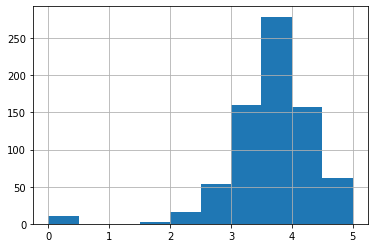

In [50]:
print(df3.rating.hist())
df3.columns

AxesSubplot(0.125,0.125;0.775x0.755)


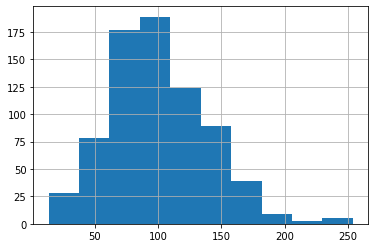

In [51]:
print(df3.Avg_Salary.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


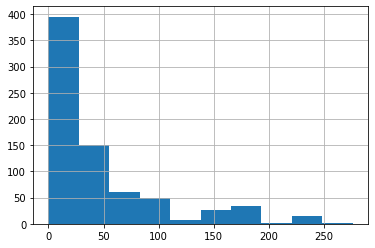

In [52]:
print(df3.company_age.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


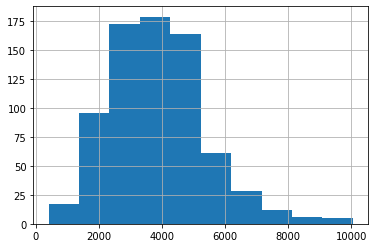

In [53]:
print(df3.job_desc.hist())

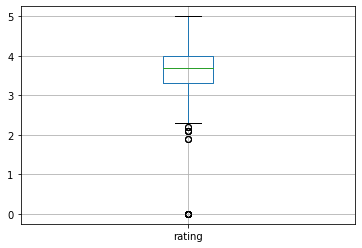

In [54]:
df3.boxplot(column = 'rating')

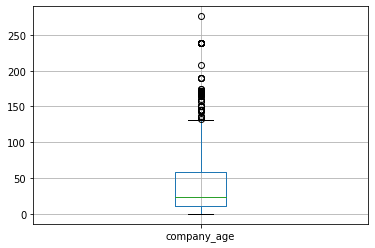

In [55]:
df3.boxplot(column = 'company_age')

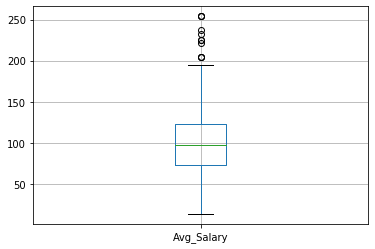

In [56]:
df3.boxplot(column = 'Avg_Salary')

In [57]:
plt.figure(figsize = [10,10])
df3.corr()

Rating   Founded  hourly  employer provided  Avg_Salary  \
Rating             1.000000  0.332950     NaN                NaN    0.013498   
Founded            0.332950  1.000000     NaN                NaN   -0.015212   
hourly                  NaN       NaN     NaN                NaN         NaN   
employer provided       NaN       NaN     NaN                NaN         NaN   
Avg_Salary         0.013498 -0.015212     NaN                NaN    1.000000   
same_state         0.085070  0.172059     NaN                NaN   -0.034403   
company_age        0.020149  0.130146     NaN                NaN    0.019704   
python_yn          0.144741  0.103636     NaN                NaN    0.328304   
vis_yn             0.099704  0.087346     NaN                NaN    0.020543   
sql_yn                  NaN       NaN     NaN                NaN         NaN   
R_yn                    NaN       NaN     NaN                NaN         NaN   
PySpark_yn         0.156996  0.067183     NaN                NaN    0.176727   
ML_yn              0.141687  0.076679     NaN                NaN    0.391732   
BigData_yn         0.145104  0.025876     NaN                NaN    0.116682   
rating             0.992947  0.309191     NaN                NaN    0.033858   
job_desc          -0.012278  0.083096     NaN                NaN    0.078792   
adv_degree        -0.143105  0.000980     NaN                NaN    0.251373   
compete_num        0.027176  0.191615     NaN                NaN    0.094034   

                   same_state  company_age  python_yn    vis_yn  sql_yn  R_yn  \
Rating               0.085070     0.020149   0.144741  0.099704     NaN   NaN   
Founded              0.172059     0.130146   0.103636  0.087346     NaN   NaN   
hourly                    NaN          NaN        NaN       NaN     NaN   NaN   
employer provided         NaN          NaN        NaN       NaN     NaN   NaN   
Avg_Salary          -0.034403     0.019704   0.328304  0.020543     NaN   NaN   
same_state           1.000000    -0.167503   0.005379  0.020427     NaN   NaN   
company_age         -0.167503     1.000000  -0.099573 -0.124919     NaN   NaN   
python_yn            0.005379    -0.099573   1.000000  0.222260     NaN   NaN   
vis_yn               0.020427    -0.124919   0.222260  1.000000     NaN   NaN   
sql_yn                    NaN          NaN        NaN       NaN     NaN   NaN   
R_yn                      NaN          NaN        NaN       NaN     NaN   NaN   
PySpark_yn          -0.054013    -0.103079   0.347180  0.058735     NaN   NaN   
ML_yn                0.041618    -0.073910   0.469919  0.144001     NaN   NaN   
BigData_yn          -0.111249    -0.053537   0.234684  0.116029     NaN   NaN   
rating               0.075166     0.004722   0.154083  0.107263     NaN   NaN   
job_desc             0.062558     0.163618   0.019268  0.027076     NaN   NaN   
adv_degree          -0.005598     0.031676  -0.050846 -0.142242     NaN   NaN   
compete_num         -0.103920     0.126080   0.090486 -0.041403     NaN   NaN   

                   PySpark_yn     ML_yn  BigData_yn    rating  job_desc  \
Rating               0.156996  0.141687    0.145104  0.992947 -0.012278   
Founded              0.067183  0.076679    0.025876  0.309191  0.083096   
hourly                    NaN       NaN         NaN       NaN       NaN   
employer provided         NaN       NaN         NaN       NaN       NaN   
Avg_Salary           0.176727  0.391732    0.116682  0.033858  0.078792   
same_state          -0.054013  0.041618   -0.111249  0.075166  0.062558   
company_age         -0.103079 -0.073910   -0.053537  0.004722  0.163618   
python_yn            0.347180  0.469919    0.234684  0.154083  0.019268   
vis_yn               0.058735  0.144001    0.116029  0.107263  0.027076   
sql_yn                    NaN       NaN         NaN       NaN       NaN   
R_yn                      NaN       NaN         NaN       NaN       NaN   
PySpark_yn           1.000000  0.302191    0.536933  0.16342

<Figure size 720x720 with 0 Axes>

In [58]:

plt.figure(figsize = [15,15])

df3[['Avg_Salary','company_age','python_yn','PySpark_yn','ML_yn','BigData_yn','adv_degree']].corr()

Avg_Salary  company_age  python_yn  PySpark_yn     ML_yn  \
Avg_Salary     1.000000     0.019704   0.328304    0.176727  0.391732   
company_age    0.019704     1.000000  -0.099573   -0.103079 -0.073910   
python_yn      0.328304    -0.099573   1.000000    0.347180  0.469919   
PySpark_yn     0.176727    -0.103079   0.347180    1.000000  0.302191   
ML_yn          0.391732    -0.073910   0.469919    0.302191  1.000000   
BigData_yn     0.116682    -0.053537   0.234684    0.536933  0.252078   
adv_degree     0.251373     0.031676  -0.050846   -0.014366  0.155297   

             BigData_yn  adv_degree  
Avg_Salary     0.116682    0.251373  
company_age   -0.053537    0.031676  
python_yn      0.234684   -0.050846  
PySpark_yn     0.536933   -0.014366  
ML_yn          0.252078    0.155297  
BigData_yn     1.000000   -0.018248  
adv_degree    -0.018248    1.000000

<Figure size 1080x1080 with 0 Axes>

In [59]:
# Getting insights from the graphs

df3_cat = df3[['Size','Headquarters','Location','Founded','job_simp', 'seniority','Type of ownership','state','Sector','Industry',
               'Revenue','company_age','job_desc','ML_yn','python_yn','adv_degree','company' ]]

df3.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'job_simp', 'seniority', 'hourly', 'employer provided',
       'Avg_Salary', 'company', 'same_state', 'state', 'company_age',
       'python_yn', 'vis_yn', 'sql_yn', 'R_yn', 'PySpark_yn', 'ML_yn',
       'BigData_yn', 'rating', 'job_desc', 'adv_degree', 'compete_num'],
      dtype='object')

graph for Size: Total  = 9


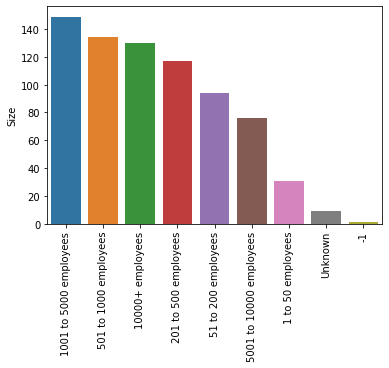

graph for Headquarters: Total  = 197


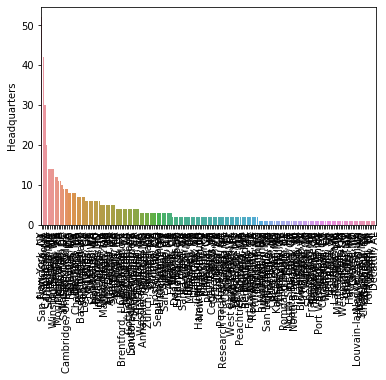

graph for Location: Total  = 199


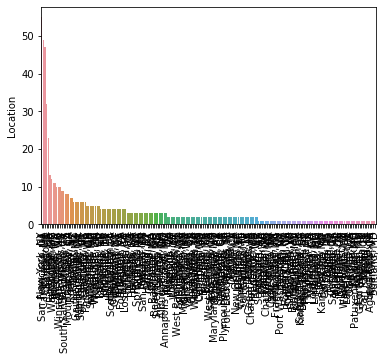

graph for Founded: Total  = 102


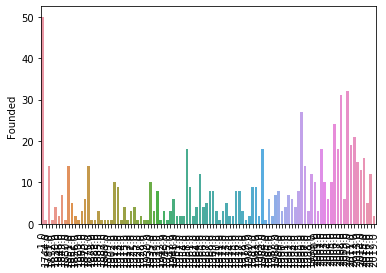

graph for job_simp: Total  = 7


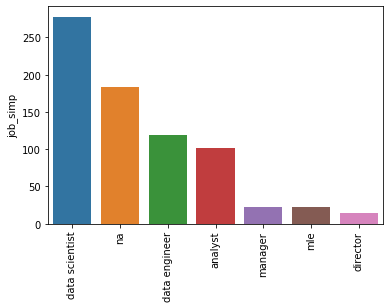

graph for seniority: Total  = 3


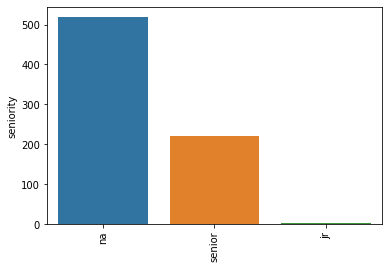

graph for Type of ownership: Total  = 11


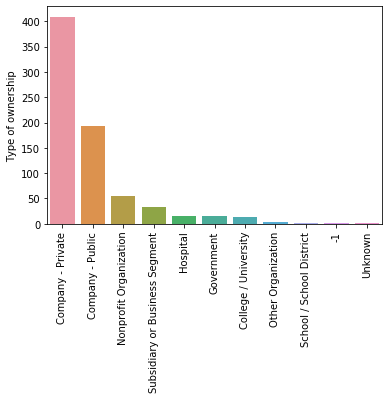

graph for state: Total  = 37


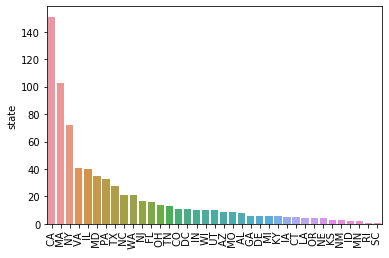

graph for Sector: Total  = 25


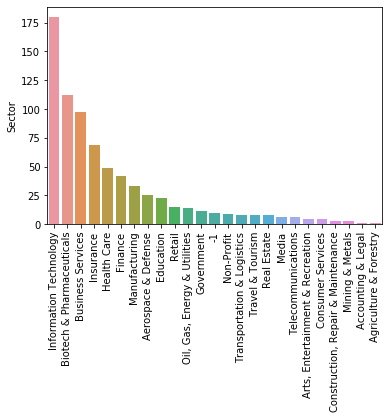

graph for Industry: Total  = 60


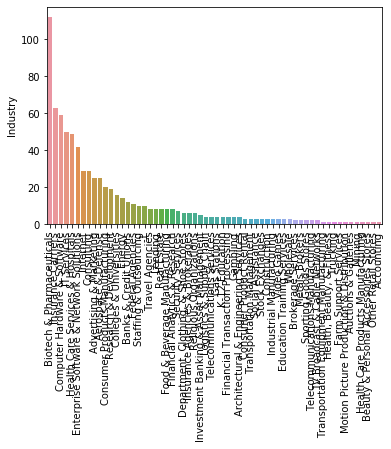

graph for Revenue: Total  = 14


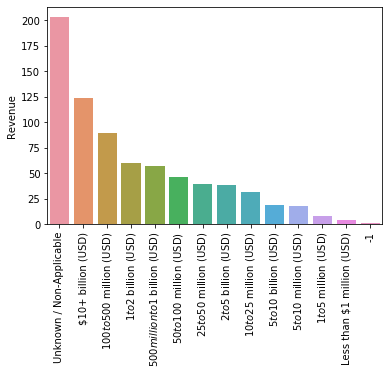

graph for company_age: Total  = 102


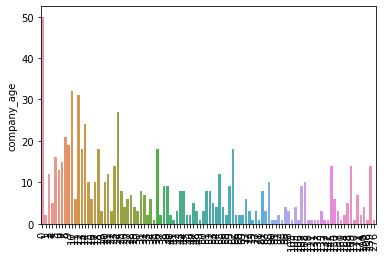

graph for job_desc: Total  = 442


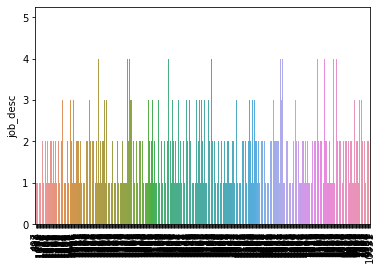

graph for ML_yn: Total  = 2


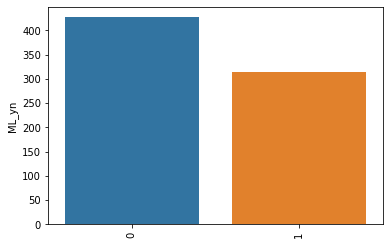

graph for python_yn: Total  = 2


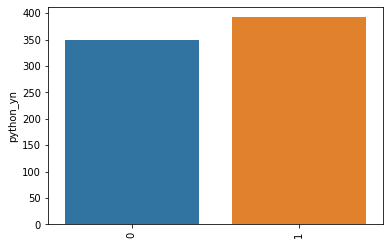

graph for adv_degree: Total  = 2


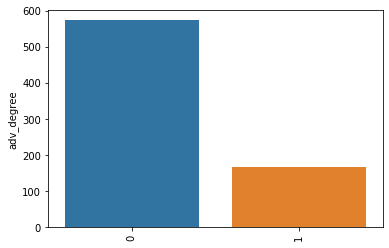

graph for company: Total  = 342


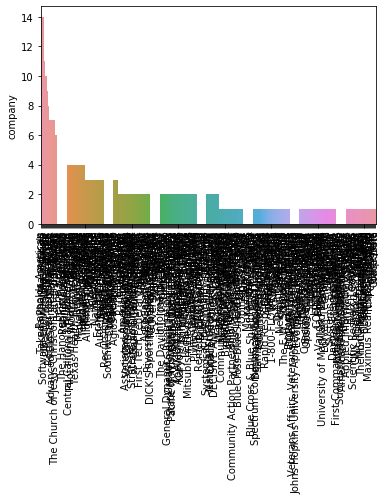

In [60]:
for i in df3_cat.columns:
    cat_num = df3_cat[i].value_counts()
    print('graph for %s: Total  = %d' % (i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

graph for Industry: Total  = 20


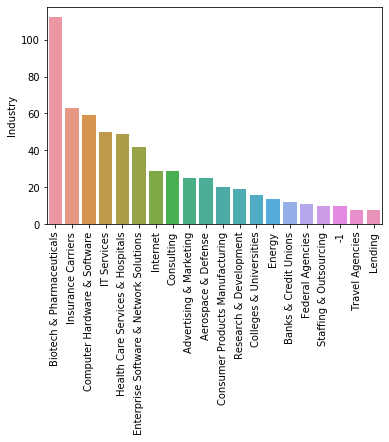

graph for company: Total  = 20


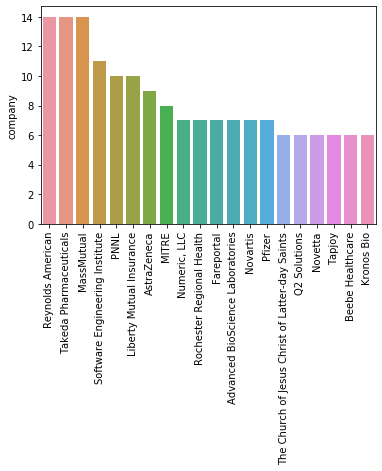

graph for Location: Total  = 20


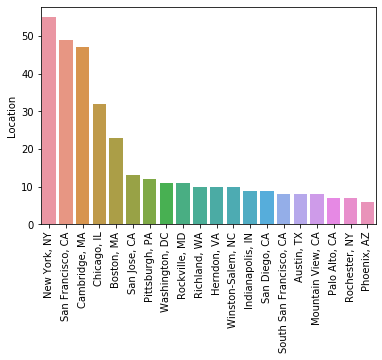

graph for Headquarters: Total  = 20


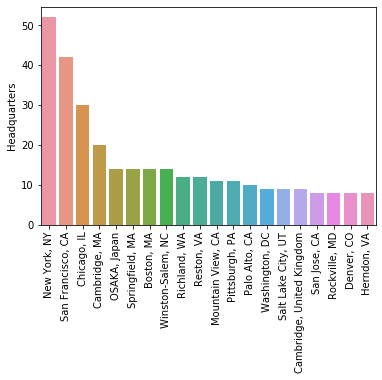

In [61]:
for i in df3_cat[['Industry','company','Location','Headquarters']].columns:
    cat_num = df3_cat[i].value_counts()[:20]
    print('graph for %s: Total  = %d' % (i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [62]:
# Pivot Tables - Salary Dependancy

pd.pivot_table(df3, index = 'Job Title', values = 'Avg_Salary')

Avg_Salary
Job Title                                                     
Ag Data Scientist                                    80.500000
Analytics - Business Assurance Data Analyst          43.000000
Analytics Consultant                                 66.500000
Analytics Manager                                    87.500000
Analytics Manager - Data Mart                        64.000000
Assistant Director/Director, Office of Data Sci...   53.000000
Associate Data Analyst                               38.500000
Associate Data Analyst- Graduate Development Pr...   45.500000
Associate Data Engineer                              65.500000
Associate Data Scientist/Computer Scientist          81.500000
Associate Director, Platform and DevOps- Data E...  154.500000
Associate Director/Director, Safety Scientist       140.000000
Associate Environmental Scientist - Wildlife Bi...   51.000000
Associate Machine Learning Engineer / Data Scie...   74.500000
Associate Principal Scientist, Pharmacogenomics      95.000000
Associate Research Scientist I (Protein Express...   87.500000
Associate Scientist                                  81.500000
Associate Scientist / Sr. Associate Scientist, ...   92.000000
Associate Scientist, LC/MS Biologics                 70.000000
Associate Scientist/Scientist, Process Analytic...  125.000000
Associate, Data Science, Internal Audit              62.500000
BI & Platform Analytics Manager                     109.500000
Big Data Engineer                                   104.500000
Big Data Engineer - Chicago - Future Opportunity    100.000000
Business Data Analyst                                53.500000
Business Data Analyst, SQL                           65.000000
Business Intelligence Analyst / Developer            79.000000
CONSULTANT– DATA ANALYTICS GROUP                     52.500000
Clinical Data Analyst                                48.500000
Clinical Data Scientist                              84.000000
Clinical Laboratory Scientist                        31.500000
Clinical Scientist, Clinical Development             37.000000
College Hire - Data Scientist - Open to Decembe...   81.000000
Computational Chemist/Data Scientist                 76.500000
Consultant - Analytics Consulting                    62.500000
Corporate Risk Data Analyst (SQL Based) - Milwa...   60.000000
Customer Data Scientist                             153.500000
Customer Data Scientist/Sales Engineer              137.500000
Customer Data Scientist/Sales Engineer (Bay         150.500000
Data & Analytics Consultant (NYC)                   114.500000
Data Analyst                                         66.300000
Data Analyst - Asset Management                     103.500000
Data Analyst / Scientist                             72.500000
Data Analyst 1, full-time contract worker for u...   50.000000
Data Analyst 2 (Missionary Department)               72.000000
Data Analyst Chemist - Quality System Contractor     85.500000
Data Analyst Senior                                  66.500000
Data Analyst, Performance Partnership                73.000000
Data Analytics Manager                               40.500000
Data Analytics Project Manager                       63.000000
Data Architect / Data Modeler                        86.500000
Data Engineer                                        91.660377
Data Engineer - Consultant (Charlotte Based)         85.500000
Data Engineer - ETL                                  65.000000
Data Engineer 4 - Contract                           87.000000
Data Engineer 5 - Contract (Remote)                 107.000000
Data Engineer I                                     146.000000
Data Engineer I - Azure                              77.500000
Data Engineer, Data Engineering and Artifical I...  102.500000
Data Engineering Analyst                             58.500000
Data Management Specialist                           48.000000
Data Modeler                                        106.500000
Data Modeler (Analyt

In [63]:
pd.pivot_table(df3, index = 'state', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)

Avg_Salary
state            
 CA    123.619205
 IL    116.662500
 DC    110.181818
 MA    106.281553
 NJ    104.558824
 MI    100.250000
 RI    100.000000
 NY     98.652778
 NC     98.452381
 MD     97.357143
 KY     97.000000
 VA     95.621951
 UT     94.150000
 WA     93.190476
 PA     92.560606
 OR     92.125000
 IN     90.300000
 TX     89.392857
 OH     87.571429
 TN     87.115385
 KS     87.000000
 AZ     85.666667
 MN     85.500000
 MO     84.722222
 GA     80.666667
 IA     78.900000
 FL     77.625000
 CO     77.045455
 NM     74.333333
 WI     73.300000
 CT     71.100000
 SC     60.500000
 AL     57.937500
 ID     56.250000
 LA     52.250000
 NE     41.000000
 DE     27.500000

In [64]:
pd.pivot_table(df3, index = 'Industry', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)



Avg_Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Brokerage Services                        129.000000
Auctions & Galleries                      128.000000
Internet                                  123.810345
Investment Banking & Asset Management     118.400000
TV Broadcast & Cable Networks             117.750000
Enterprise Software & Network Solutions   115.369048
Computer Hardware & Software              115.194915
-1                                        114.650000
Accounting                                113.500000
Biotech & Pharmaceuticals                 111.767857
Insurance Agencies & Brokerages           109.250000
K-12 Education                            108.875000
Consulting                                108.689655
Transportation Management                 107.500000
Metals Brokers                            107.000000
Staffing & Outsourcing                    106.200000
Video Games                               106.166667
Insurance Carriers                        105.626984
Real Estate                               104.750000
Transportation Equipment Manufacturing    104.500000
Advertising & Marketing                   104.300000
Wholesale                                 103.166667
IT Services                               102.840000
Colleges & Universities                   102.687500
Aerospace & Defense                        99.060000
Logistics & Supply Chain                   98.250000
Gas Stations                               98.000000
Mining                                     98.000000
Consumer Products Manufacturing            95.350000
Security Services                          93.500000
Department, Clothing, & Shoe Stores        92.666667
Stock Exchanges                            87.000000
Consumer Product Rental                    86.666667
Beauty & Personal Accessories Stores       85.500000
Sporting Goods Stores                      85.000000
Lending                                    83.000000
Farm Support Services                      80.500000
Energy                                     80.464286
Industrial Manufacturing                   79.833333
Education Training Services                79.500000
Trucking                                   79.000000
Religious Organizations                    78.833333
Federal Agencies                           78.545455
Research & Development                     78.394737
Financial Transaction Processing           76.500000
Health Care Products Manufacturing         73.000000
Banks & Credit Unions                      70.625000
Travel Agencies                            69.500000
Health Care Services & Hospitals           67.622449
Food & Beverage Manufacturing              53.250000
Architectural & Engineering Services       50.500000
Gambling                                   48.500000
Social Assistance                          48.166667
Telecommunications Manufacturing           44.000000
Construction                               26.500000

In [65]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df3,index = ['job_simp','state'], 
               values = 'Avg_Salary').sort_values(['job_simp','Avg_Salary'], ascending = False)

Avg_Salary
job_simp       state            
na              AZ    124.500000
                MA    107.478261
                KY    103.500000
                CA     99.907407
                WA     97.500000
                OH     91.166667
                NC     90.916667
                MD     88.750000
                NJ     82.500000
                NY     81.583333
                GA     80.000000
                VA     79.300000
                PA     76.062500
                MO     72.333333
                IN     69.000000
                CT     62.500000
                SC     60.500000
                IL     57.166667
                WI     54.000000
                AL     43.750000
                TX     41.285714
                NE     41.000000
                CO     31.500000
                DE     27.500000
                LA     20.000000
mle             CA    177.300000
                IL    133.000000
                NY    125.000000
                PA    120.500000
                CO    100.500000
                KS     87.000000
                VA     87.000000
manager         PA    109.666667
                NJ    109.500000
                MI     87.500000
                CA     80.611111
                MA     71.900000
                MO     40.500000
director        IL    221.750000
                NJ    161.500000
                MA    117.833333
data scientist  DC    149.000000
                CA    143.044776
                UT    140.500000
                MO    127.666667
                IL    117.233333
                NC    117.000000
                NY    115.250000
                MA    113.750000
                WI    113.500000
                PA    113.333333
                MD    109.115385
                CO    108.666667
                VA    108.416667
                NJ    106.875000
                MI    106.625000
                OH    105.285714
                TX    100.730769
                WA     99.764706
                OR     98.500000
                FL     97.357143
                TN     96.000000
                IN     84.500000
                CT     84.000000
                KY     84.000000
                GA     81.333333
                NM     74.333333
                AZ     69.500000
data engineer   CA    129.540000
                IN    114.500000
                TX    113.062500
                NJ    112.000000
                MD    109.000000
                MA    107.291667
                NC    104.250000
                IA    102.833333
                TN    100.950000
                UT    100.333333
                CO     99.000000
                VA     96.900000
                IL     96.125000
                MN     95.000000
                FL     91.833333
                PA     91.500000
                NY     86.375000
                DC     85.000000
                AZ     79.500000
                OR     73.000000
                LA     70.500000
                AL     65.000000
analyst         RI    100.000000
                CA     85.250000
                NJ     83.583333
                MD     80.666667
                MN     76.000000
                VA     71.583333
                IL     66.500000
                NY     65.607143
                DC     63.500000
                PA     62.750000
                AL     62.200000
                MO     61.000000
                MA     59.125000
                WI     58.833333
                ID     56.250000
                AZ     55.000000
                UT     54.750000
                WA     54.500000
                OH     53.875000
                LA     48.000000
                FL     47.500000
                IA     43.000000
                CO     29.500000
                TN     13.500000

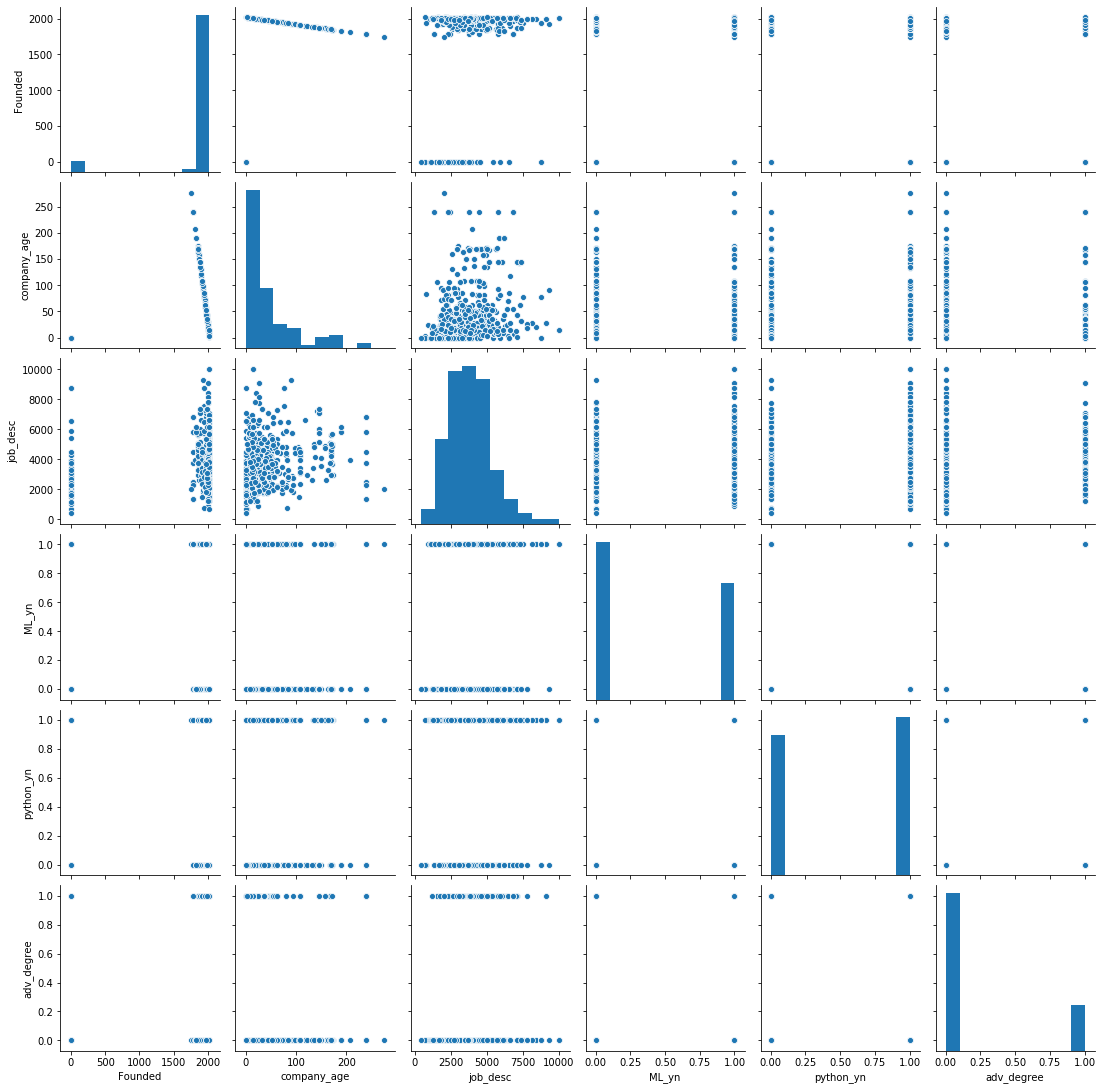

In [66]:
sns.pairplot(df3_cat)

In [67]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aneesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Aneesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

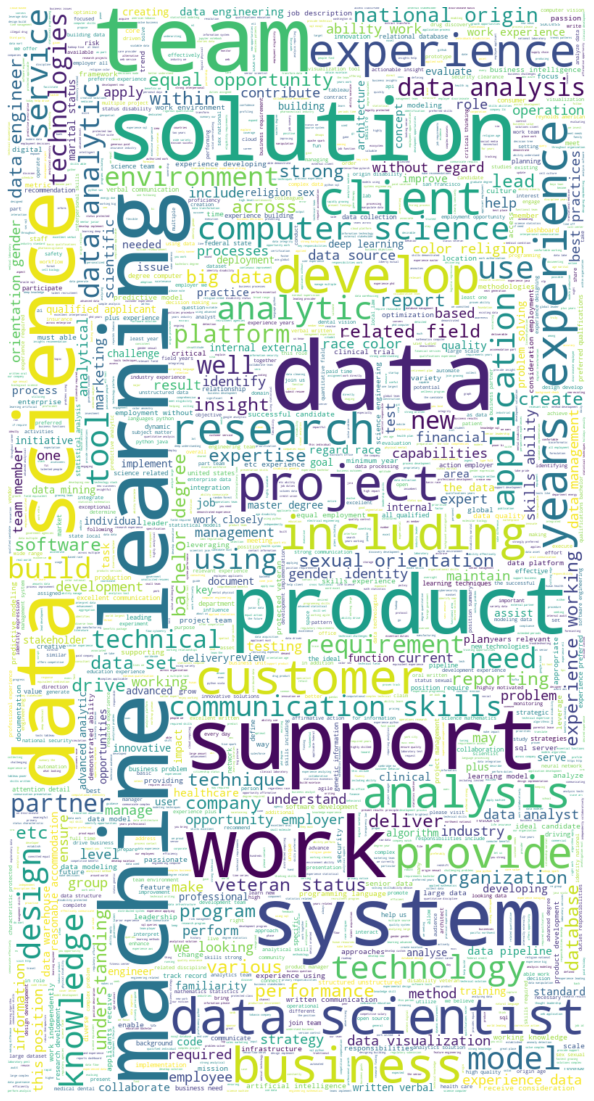

In [68]:


from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[20,20])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()


In [74]:
df3.to_csv('EDA Data.csv')